# Lets dicuss neural networks

The term 'neural network' has it's origins in attempts to find mathematical representations of information processing in biological systems

neural networks are even more necessary as we continue to tackle more ambitious problems. Linear models suffer from the 'curse of dimensionality'[1]. A support vector machine (SVM) is an upgrade however. When I say neural network i am refering to feed forward neural network . As this is only a short notebook I will gloss over many of the nitty gritty mostly because the notebook would be far too long and also partly because I do not currently yet possess the advanced mathematical knowlege to honestly discuss these models in serious depth. However I really enjoy learning the maths behind these models and I will discuss some of it as best I can. I am using the book https://www.goodreads.com/book/show/55881.Pattern_Recognition_and_Machine_Learning

## Lets dicuss Linear Models 

I will explain the basics for anyone not familiar with linear models. Another way to re-phrase the question would be to discuss the linear classifiers in machine learning domain. There are many so I will discuss the main ones. The reason for this is that you need to understand Linear Models and why they don't work that well in certain situations.

### Warning Incoming Maths!

Many people fear maths. To any programmers reading this, you know far more maths that you're aware of. A fantastic book I have found incredibly useful ==> https://www.goodreads.com/book/show/42970131-a-programmer-s-introduction-to-mathematics. Maths is a language, the language of the universe and is certainly worth becoming familiar with. Imagine being illiterate. The amount of doors this would close is astonising. Now imagine being illiterate in the language of the universe. Becoming literate in this language opens so many doors. That's my rant over!

#### Lets start

The simplest linear model for regression is one that involves a linear combination of
the input variables $$\ y(x,w)=w0 +w1x1 +...+wDxD$$
                
                
where x = (x1,...,xD)^T. This is known as linear regression  

The key property of this model is that it is a linear function of the parameters w0 , . . . , wD.

 It is also, however, a linear function of the input variables Xi, and this imposes significant limitations on the model.

*I Need to retype the equations in latex

## More advanced models (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. An example in plain english is included below. I find it's easier to understand using examples

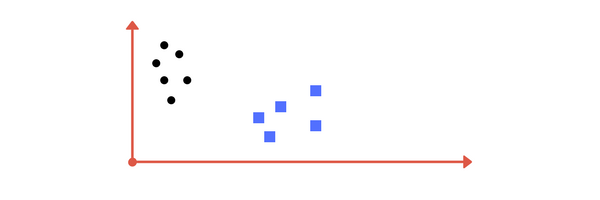

Now lets say we want to classify something based on where it falls on this 2d grid. A pretty reasonable approach would be to draw a best fitting line to seperate the classes(blue and black).

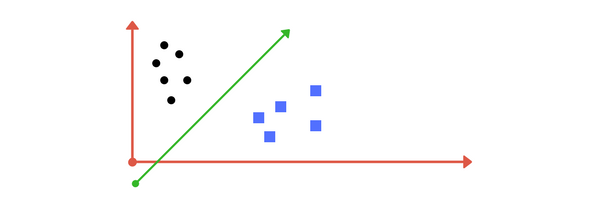

Now we've seperated the two classes of objects. Therefore if a new class of object fell to the right of the green line we could reasonably say that it is a blue object. However this is an extremely trivial example with only two items on a simple 2d plane. In fact if we just used basic probability we'd have a 50/50 chance of guessing the correct answer. However SVM's become far more complicated as we deal with many data points in 3d space but the main concept holds through

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
%matplotlib inline

bankdata = pd.read_csv("/Users/rossheaney/Downloads/bill_authentication.csv")

bankdata.shape

bankdata.head()


X = bankdata.drop('Class', axis=1)
y = bankdata['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)


#Lets make a prediction
y_pred = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))




[[154   5]
 [  1 115]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       159
           1       0.96      0.99      0.97       116

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



#### Lets talk neural networks

Neural networks are all the range these days and for good reason. They allow us to tackle bigger and even more complex problems by leveraging ideas from the most complex object on the planet, the human brain. Neural networks can contains thousands of data points. I think an example of a neural network will explain it better

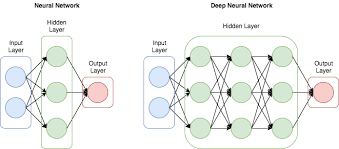

Here we see two diagrams, one labelled neural network and the other labelled deep neural network. The only differnece between these models is in complexity. The deep neural network is 'deep' in complexity, has more hidden layers etc. Obviously I'm glossing over many details here in the interest of time.

Each circle represents a neuron. So lets see how these neurons work in the model!

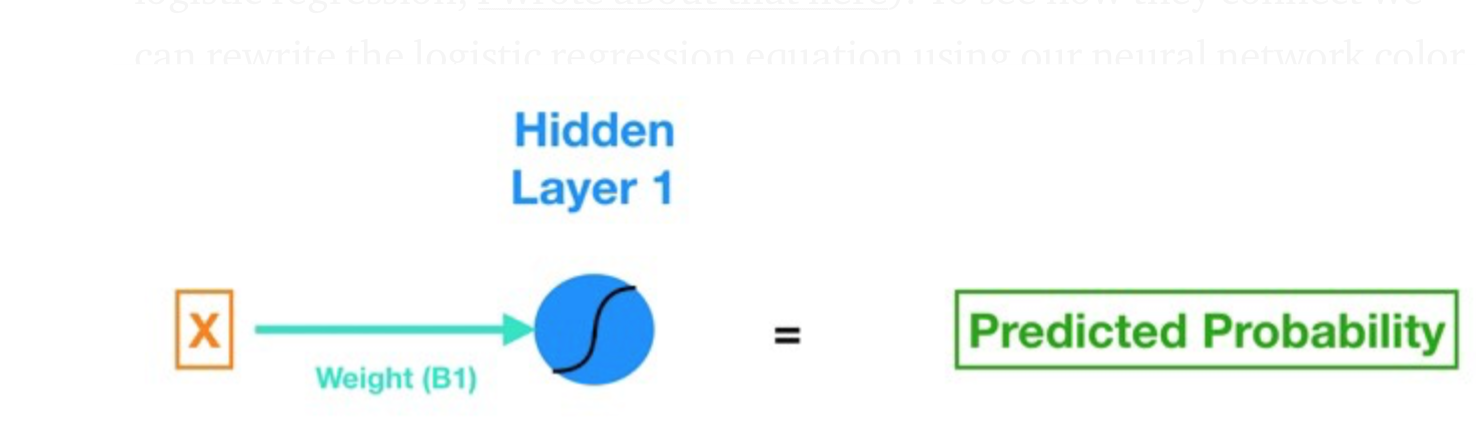

Thi is a high level diagram. Lets break this down into a mathematical equation that is is easier to explain 

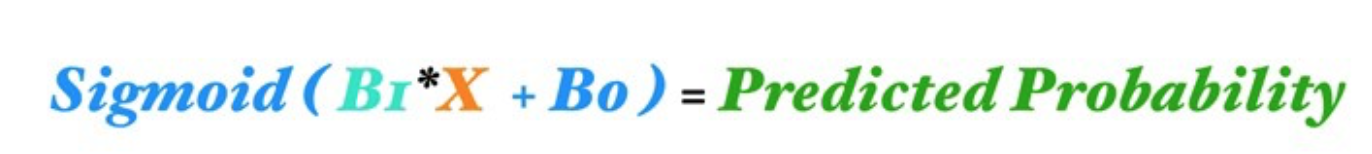

1. We can think of X as our input. It's basically a feature we give our model.(Even though we may be trying to do something non numerical,i.e predicting if something is a cat or not, the value we give it must be numerical)
2. B1 - This is the estimated slope parameter of our logistic regression. This is basically the rate at which the predicted log odds increases, ie how much the slope changes.
3. Bo - This is our bias. Bias in Machine Learning is defined as the phenomena of observing results that are systematically prejudiced due to faulty assumptions. As you can imagine we should try to limit bias as much as possible as it can give rise to faulty results. However bias can lead to favourable results. This can involve lots of experimentation to find a suitable cost function(bias reduction). This is a simplified description as there is a lot complexity involved in reducing bias
4. A sigmoid function is a type of activation function, and more specifically defined as a squashing function
5. And finally we get our predicted probability by applying the sigmoid function to the quantity (B1*X + B0).

### Tensorflow and Keras

Keras is an open-source neural-network library written in Python. Tensorflow is a symbolic math library, and is also used for machine learning applications such as neural networks. They are both freely avaiable and abstract a lot of the complicated details out of building machine learning models for better or worse. Lets see some examples!

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation

# We create 
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])


model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))

Using TensorFlow backend.


We import keras(duh!). The Sequential model is a linear stack of layers. 